In [ ]:
#@title Materials for this exercise are taken from the listed sources

#Lab work created by Dr Siobhan Connolly for Statistics Module
#Decathalon Dataset downloaded and changed from kaggle


## Learning Outcomes:

  * Use ANOVA test analyse factors in the given dataset
  * Use PCA to reduce dimension
  

# **One-Way ANOVA**
  


In [1]:
#@title Load the imports

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#@title Initialising Dataset

df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})




## Task 1 - Explore the dataset

* types of variables 
* Investigate using plots (bivariate and/or boxplots) if there exists some relationship between variables. Can you determine the response variable?


Dataset types
water     object
sun       object
height     int64
dtype: object


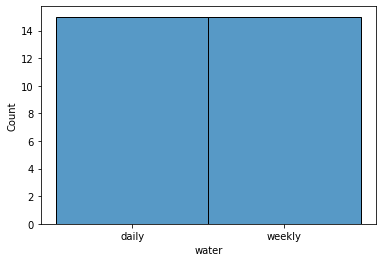

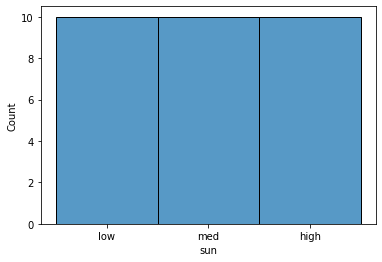

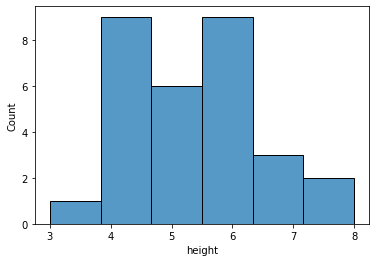

In [8]:
#@title Write your code and comments for Task 1 here
print("Dataset types")
print(df.dtypes)

for att in df:
    sns.histplot(df, x=att)
    plt.show()


In this dataset, we have 2 categorical attributes (water & sun) and one numerical attribute (height)

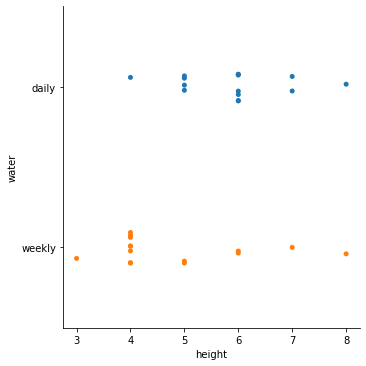

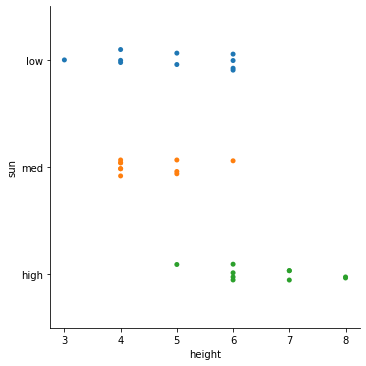

In [14]:
sns.catplot(x='height', y='water', data=df)
sns.catplot(x='height', y='sun', data=df)
plt.show()

The response variable seems to be 'height' and the explanatory variables are 'sun' and 'water'. This dataset could be the different heights achieved by a particular plant species when given different amounts of sun and varying when it is watered. Therefore, there should be a relationship between the response variable and the explanatory ones, like we can see in the previous plots.



## Task 2 - State a hypothesis and use one-way ANOVA test for testing the hypothesis.

*Hint*: Use continous variable as response variable and a factor as dependent variable.

H0: The mean height of high, med and low levels of sun are equal <br>
H1: The mean height of high, med and low levels of sun are NOT equal  

In [17]:
#@title State your hypothesis and write your code for ANOVA test here.
model = ols('height ~ C(sun)', data=df).fit()
aov_table = anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,24.866667,12.433333,14.105042,0.000064
Residual,27.0,23.800000,0.881481,NaN,NaN


## Task 3 -  Concluding remarks of the ANOVA test


If we assume a confidence interval of 95%, according to the table above, we would reject the null hypothesis because the p-value calculated is less than 0.05. That is, p = 0.000064 and p < 0.05. Therefore, we conclude that it is statistically probable that the mean of height for the different levels of sun are not equal. 

# **Principal Component Analysis**

## Task 4 - Load the dataset decathalon.csv from Moodle and standardize the data.



            100m  Long.jump   Shot.put  High.jump       400m  110m.hurdle  \
count  41.000000  41.000000  41.000000  41.000000  41.000000    41.000000   
mean   10.998049   7.260000  14.477073   1.976829  49.616341    14.605854   
std     0.263023   0.316402   0.824428   0.088951   1.153451     0.471789   
min    10.440000   6.610000  12.680000   1.850000  46.810000    13.970000   
25%    10.850000   7.030000  13.880000   1.920000  48.930000    14.210000   
50%    10.980000   7.300000  14.570000   1.950000  49.400000    14.480000   
75%    11.140000   7.480000  14.970000   2.040000  50.300000    14.980000   
max    11.640000   7.960000  16.360000   2.150000  53.200000    15.670000   

          Discus  Pole.vault   Javeline       1500m       Rank       Points  
count  41.000000   41.000000  41.000000   41.000000  41.000000    41.000000  
mean   44.325610    4.762439  58.316585  279.024878  12.121951  8005.365854  
std     3.377845    0.278000   4.826820   11.673247   7.918949   342.385

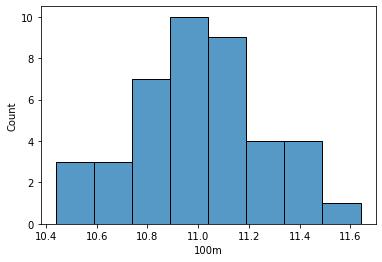

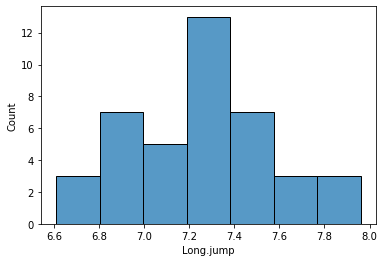

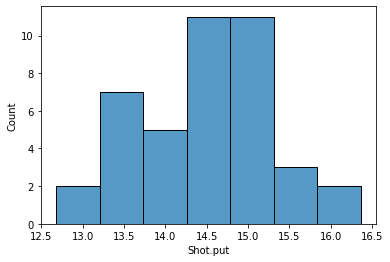

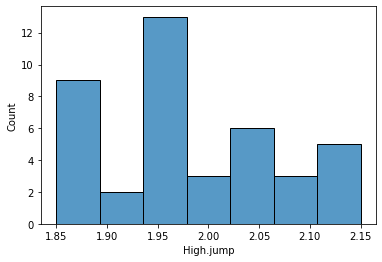

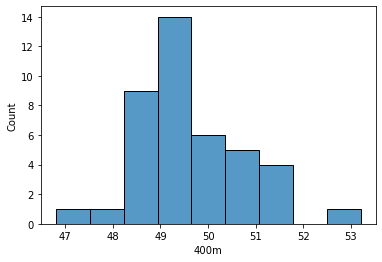

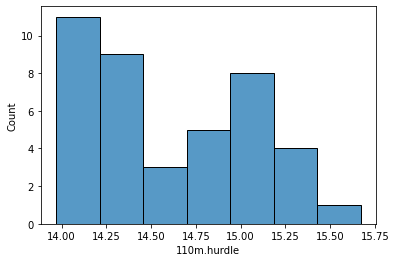

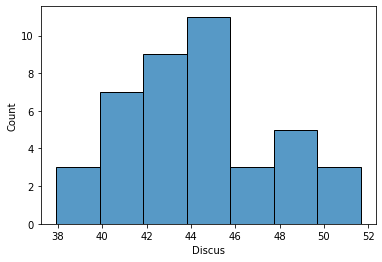

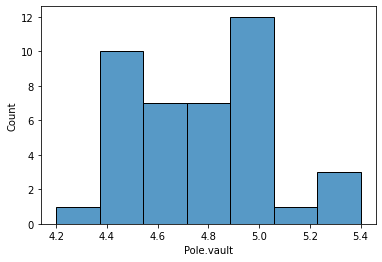

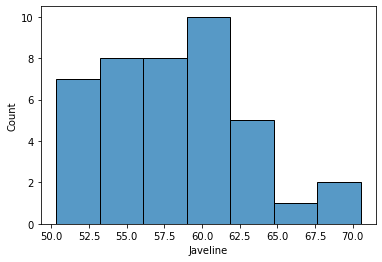

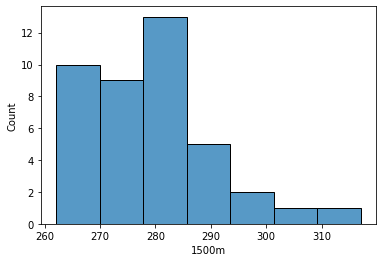

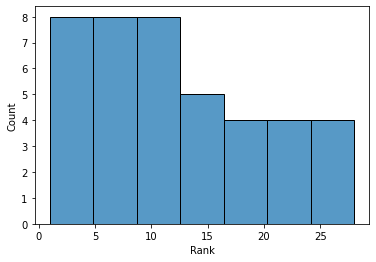

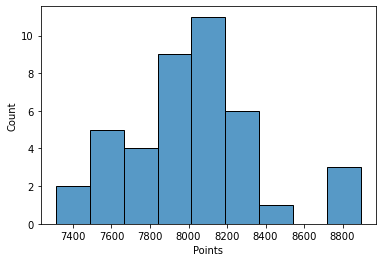

[[ 1.61477791e-01  1.02393687e+00  4.33405055e-01  1.06045671e+00
   1.69980655e-01  1.80571557e-01 -1.72524347e-01  9.37988410e-01
   1.02219600e+00  1.09931561e+00 -1.42192065e+00  6.25795966e-01]
 [-9.16292580e-01  4.47972380e-01 -2.66572563e-01 -1.32973498e+00
  -2.16222244e-01 -1.19281907e+00  1.91655543e+00  5.73807304e-01
   3.84557695e-01  1.94927138e+00 -1.29407253e+00  3.44883751e-01]
 [ 8.44941928e-02  1.27992108e-01  3.59723200e-01  7.19000754e-01
  -1.09395610e+00 -1.10698215e+00  1.38604306e+00  5.73807304e-01
  -1.67937681e+00  1.83652215e+00 -1.16622440e+00  2.76873425e-01]
 [ 8.44941928e-02 -9.59940813e-02 -2.78852872e-01 -6.46823072e-01
  -6.02425143e-01  8.24348413e-01 -1.03573091e+00  2.03053173e+00
   9.34101232e-01  9.32455207e-02 -1.03837627e+00  1.82250364e-01]
 [ 1.31623176e+00 -5.43966461e-01  8.75496182e-01  1.40191267e+00
   7.05398310e-01  1.51104373e+00  5.79784151e-01 -1.54554909e-01
   1.07463336e+00 -2.27656147e-01 -9.10528139e-01  9.05842726e-02]
 [ 4.

In [2]:
#@title Write your code here
data = pd.read_csv("decathlon.csv")
print(data.describe())

atts = ["100m", "Long.jump", "Shot.put", "High.jump", "400m", "110m.hurdle", "Discus", "Pole.vault", "Javeline", "1500m", "Rank", "Points"]
targ = ["Competition"]

for att in atts:
    sns.histplot(data[att])
    plt.show()

x = data.loc[:, atts].values
y = data.loc[:, targ].values

x = StandardScaler().fit_transform(x)

print(x)
print(y)

## Task 5 - Perform PCA on the standardized dataset and plot barchart ( Percentage of explained variance Vs Dimensions)

Use sklearn.decomposition.PCA from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html for your principal analysis

Percentage of explained variance for 1 principal components : 39.656586572025596
Percentage of explained variance for 2 principal components : 54.15780456500603
Percentage of explained variance for 3 principal components : 65.94865756090181
Percentage of explained variance for 4 principal components : 75.38014081266499
Percentage of explained variance for 5 principal components : 82.5629931439899
Percentage of explained variance for 6 principal components : 87.62398367855633
Percentage of explained variance for 7 principal components : 91.87773859563664
Percentage of explained variance for 8 principal components : 95.30344267030284
Percentage of explained variance for 9 principal components : 97.26351481186079
Percentage of explained variance for 10 principal components : 98.8248784422774
Percentage of explained variance for 11 principal components : 99.99954979975297
Percentage of explained variance for 12 principal components : 100.00000000000003


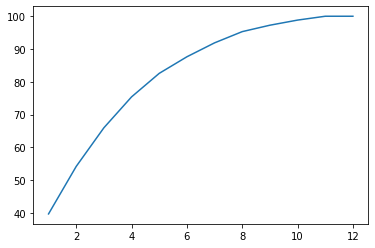

In [3]:
expVar = []
for i in range(len(atts)):
    pca = PCA(n_components=i+1)

    principalComponents = pca.fit_transform(x)
    principalDataframe  = pd.DataFrame(data = principalComponents)
    expVar.append(pca.explained_variance_ratio_.sum()*100)
    print("Percentage of explained variance for " + str(i+1) + " principal components : " + str(expVar[i]))

sns.lineplot(x=list(range(1, len(atts)+1)), y = expVar)
plt.show()

## Task 6: Plot the contributions of all features for PC1 and PC2.Interpret your results.




In [7]:
#@title Write your code here
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDataframe  = pd.DataFrame(data = principalComponents, columns=['pca1', 'pca2'])
finalDf = pd.concat([principalDataframe, data['Competition']], axis = 1)

              pca1          pca2
pca1  1.000000e+00  4.516754e-17
pca2  4.516754e-17  1.000000e+00


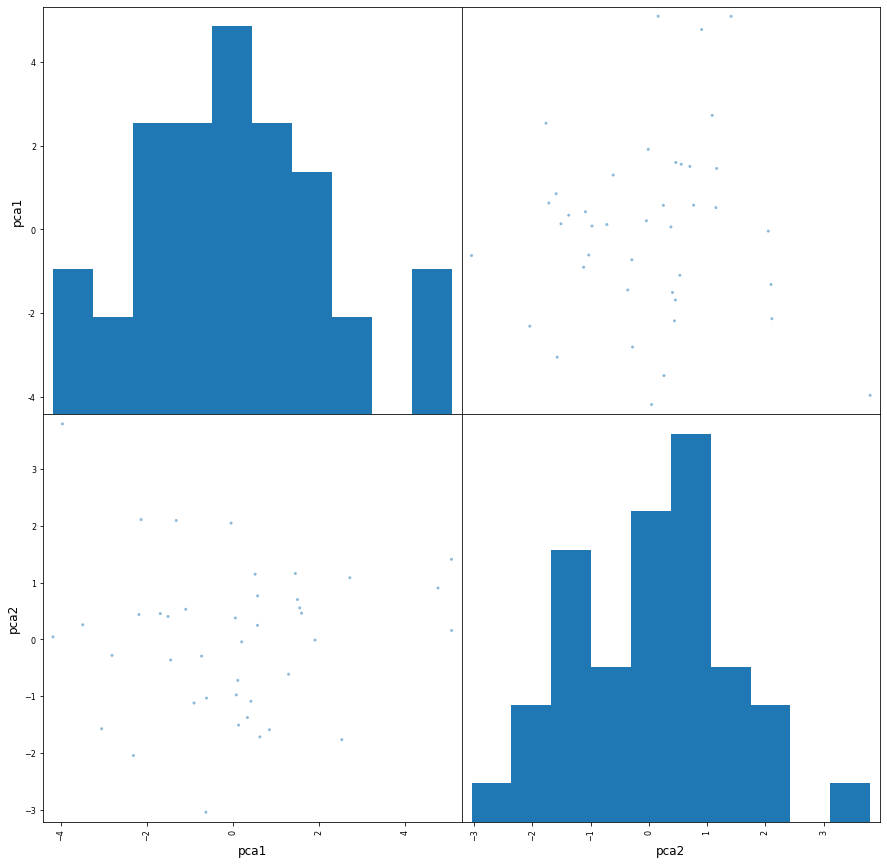

In [8]:
print(finalDf.corr())

# Scatter Plot
plt.rc('font', size =12)
pd.plotting.scatter_matrix(finalDf, figsize=(15,15))
plt.show()

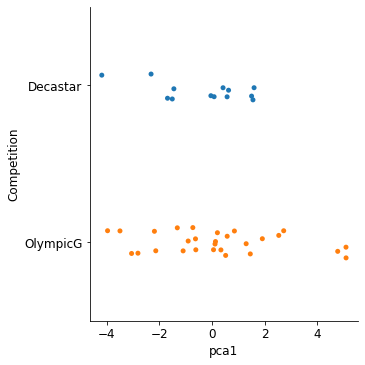

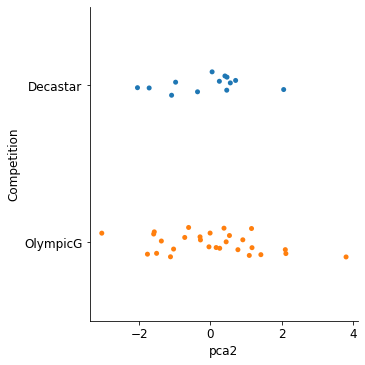

In [12]:
sns.catplot(x='pca1', y='Competition', data=finalDf)
sns.catplot(x='pca2', y='Competition', data=finalDf)
plt.show()

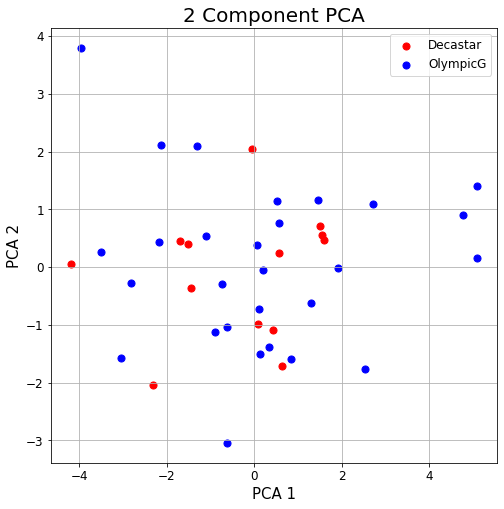

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA 1', fontsize=15)
ax.set_ylabel('PCA 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

targets = ['Decastar', 'OlympicG']
colors = ['r','b']
for target, color in zip(targets, colors):
    iToKeep = finalDf['Competition'] == target
    ax.scatter(finalDf.loc[iToKeep, 'pca1'],
               finalDf.loc[iToKeep, 'pca2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()


There is no much we can extract from these plots. If anything, we could say that the instances with a higher value in pca1, correspond to the OlympicG class. As for the rest of values, they are quite mixed and there's no real relationship that we can extract from this plot.